In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os

In [17]:
datapath = '../../../data/audio'
cfg = np.load(os.path.join(datapath, '1000Hz/config.npy'), allow_pickle=True).item()
nfft = cfg['nfft']
dist_start = 5
dist_end = 200
dist_vec = cfg['dist_vec']
rbw = cfg['rbw']
rbw

800

In [14]:
recData = np.load(os.path.join(datapath, '1000Hz/recording.npy'))
calFrame = np.load(os.path.join(datapath, '1000Hz/calibration.npy'))
# recData -= calFrame[0, :, :]

Text(0, 0.5, 'Amplitude')

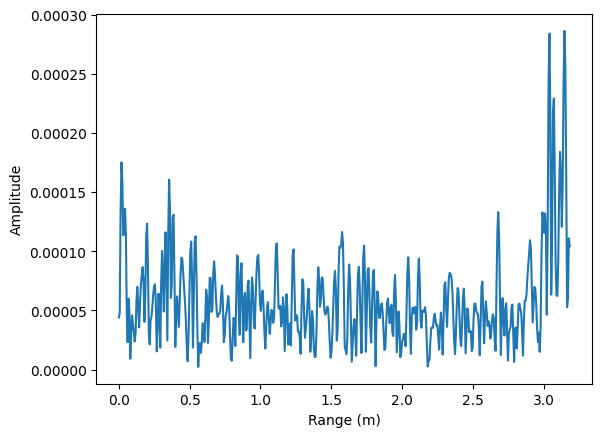

In [18]:
rp = np.fft.ifft(recData[:, 0, :], n=nfft, axis=1)
plt.plot(dist_vec, np.abs(rp[0]))
plt.xlabel("Range (m)")
plt.ylabel("Amplitude")

Text(0.5, 1.0, 'Symmetrical Range Profile from FFT')

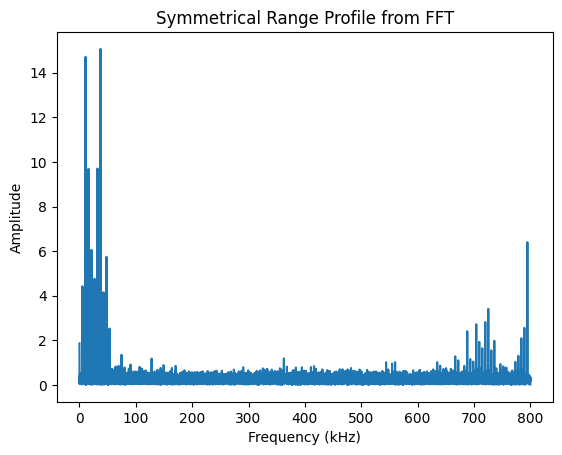

In [21]:
calData = recData - calFrame[0, :, :]
# calData = recData

calData = np.concatenate([recData[i, 0, :] for i in range(recData.shape[0])])
fft_concat = np.abs(np.fft.fft(calData))
# for txrx in range(400):
    # fft_concat += np.abs(np.fft.fft(concat_frames))

concat_freq_vec = np.arange(calData.shape[0]) / calData.shape[0] * rbw
plt.plot(concat_freq_vec, np.abs(fft_concat))
plt.xlabel("Frequency (kHz)")
plt.ylabel("Amplitude")
plt.title("Symmetrical Range Profile from FFT")

In [38]:
# speaker at 40 cm
dist_bin = np.argmax(dist_vec > 0.4)
speaker_bin = int(15000 * (nfft - dist_bin) / nfft)
print(speaker_bin, concat_freq_vec[speaker_bin])

13095 698.4


Text(0, 0.5, 'Amplitude')

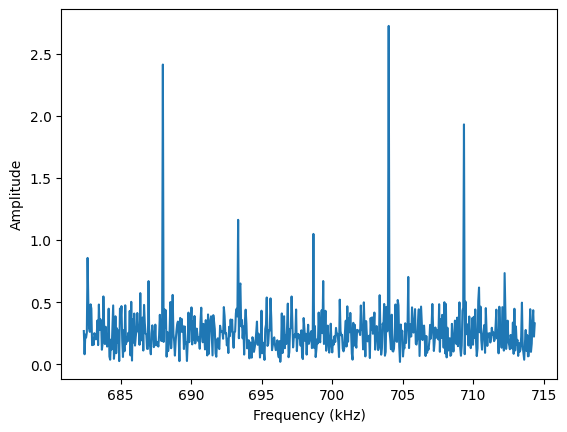

In [40]:
width = 300
start_freq_index, end_freq_index = speaker_bin - width, speaker_bin + width
plt.plot(concat_freq_vec[start_freq_index:end_freq_index], np.abs(fft_concat[start_freq_index:end_freq_index]))
plt.xlabel("Frequency (kHz)")
plt.ylabel("Amplitude")
# plt.ylim([0, 0.4])

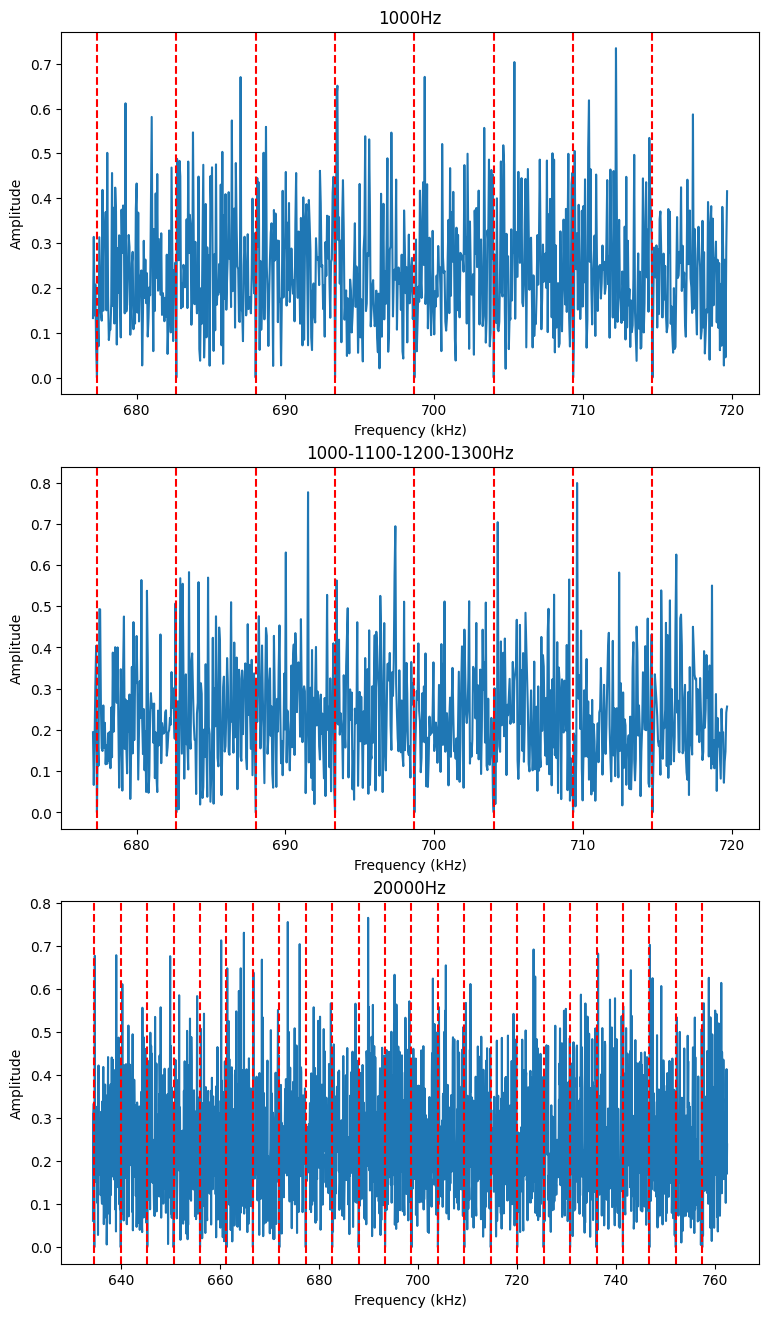

In [50]:
filenames = ['1000Hz', '1000-1100-1200-1300Hz', '20000Hz']
widths = [400, 400, 1200]

plt.subplots(3, 1, figsize=(9, 16))

for index in range(3):
    filename = filenames[index]
    recData = np.load(os.path.join(datapath, '{}/recording.npy'.format(filename)))
    calFrame = np.load(os.path.join(datapath, '{}/calibration.npy'.format(filename)))
    
    calData = recData - calFrame[0, :, :]

    calData = np.concatenate([recData[i, 0, :] for i in range(recData.shape[0])])
    fft_concat = np.abs(np.fft.fft(calData))
    fft_concat[::100] = 0

    concat_freq_vec = np.arange(calData.shape[0]) / calData.shape[0] * rbw

    width = widths[index]
    start_freq_index, end_freq_index = speaker_bin - width, speaker_bin + width
    plt.subplot(3, 1, index + 1)
    plt.plot(concat_freq_vec[start_freq_index:end_freq_index], np.abs(fft_concat[start_freq_index:end_freq_index]))
    plt.xlabel("Frequency (kHz)")
    plt.ylabel("Amplitude")
    plt.title(filename)

    for i in range(0, 15000, 100):
        if i > start_freq_index and i < end_freq_index:
            plt.axvline(x=concat_freq_vec[i], color='r', linestyle='--')

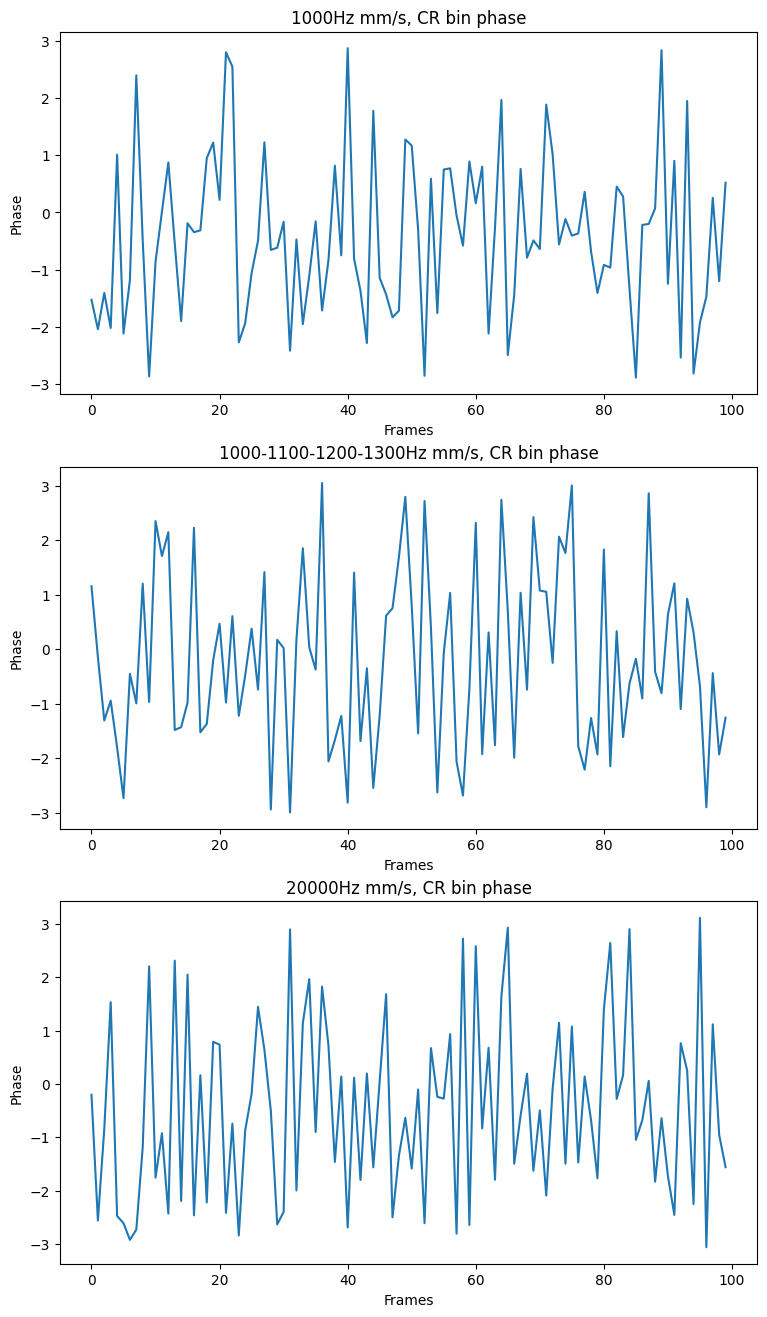

In [55]:
plt.subplots(3, 1, figsize=(9, 16))
for idx in range(3):
    recData = np.load(os.path.join(datapath, '{}/recording.npy'.format(filenames[idx])))
    rp = np.fft.ifft(recData[:, 0, :], axis=1, n=nfft)[:, dist_start:dist_end]
    rd = np.fft.fft(rp, axis=0)
    # print(dist_vec[speaker_bin])

    plt.subplot(3, 1, idx+1)
    plt.plot(np.arange(100), np.angle(rp[:, dist_bin]))
    plt.xlabel('Frames')
    plt.ylabel('Phase')
    plt.title('{} mm/s, CR bin phase'.format(filenames[idx]))

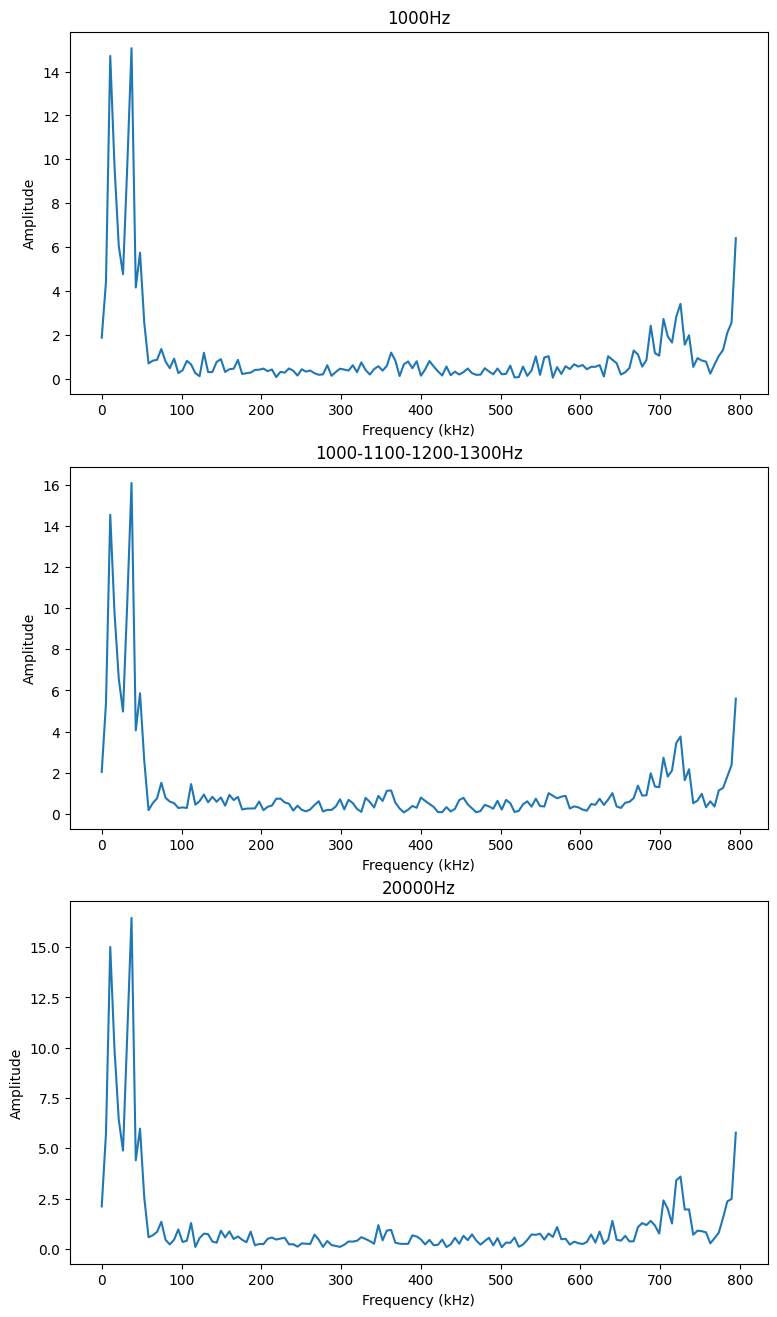

In [58]:
filenames = ['1000Hz', '1000-1100-1200-1300Hz', '20000Hz']
widths = [400, 400, 1200]
hzs = [1000, 1100, 20000]

plt.subplots(3, 1, figsize=(9, 16))

for index in range(3):
    filename = filenames[index]
    recData = np.load(os.path.join(datapath, '{}/recording.npy'.format(filename)))
    calFrame = np.load(os.path.join(datapath, '{}/calibration.npy'.format(filename)))
    
    calData = recData - calFrame[0, :, :]

    calData = np.concatenate([recData[i, 0, :] for i in range(recData.shape[0])])
    fft_concat = np.abs(np.fft.fft(calData))
    
    freq_bin = np.argmax(concat_freq_vec > hzs[index])
    indices = np.arange(0, 15000, 100) - freq_bin

    concat_freq_vec = np.arange(calData.shape[0]) / calData.shape[0] * rbw

    width = widths[index]
    start_freq_index, end_freq_index = speaker_bin - width, speaker_bin + width
    plt.subplot(3, 1, index + 1)
    plt.plot(concat_freq_vec[indices], np.abs(fft_concat[indices]))
    plt.xlabel("Frequency (kHz)")
    plt.ylabel("Amplitude")
    plt.title(filename)